In [1]:
import os, shutil
original_dataset_dir = R'E:\data\kaggle_original_data\train' #from ehere i am fetcing data

In [2]:
#setting a base directory where your file will gonna be made 
base_dir = R'E:\data\kaggle_original_data\cats_and_dogs_small'
os.mkdir(base_dir)

In [3]:
# made folder in my working directory  with name of train,validation , test .

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
#making folder with name of cats and dog in train folder

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [5]:
#making folder with name of cats and dog in validation folder

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [6]:
#making folder with name of cats and dog in test folder

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [7]:
#moving first 1000 cat images from original data to our working directory in train folder 

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
#moving first 500 cat images from original data to our working directory in validation folder

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
#moving first 500 cat images from original data to our working directory in test folder

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
#moving first 1000 dog images from original data to our working directory in train folder

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
#moving first 500 dog images from original data to our working directory in validation folder

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
#moving first 500 dog images from original data to our working directory in train folder

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [17]:
model = models.Sequential()     #using sequential model 

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3))) #adding set of CNN and maxcooling
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [18]:
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [24]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)   #rescaling images
test_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(train_dir,                      #resziing  train images 
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary') # used binnary because we have two classes cats and dog

Found 2000 images belonging to 2 classes.


In [30]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [32]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [33]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=6, #There we should do 100 epoch but due to so much time consumtion i am limiting it to 5 and just moving forward
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/6
100/100 [==============================] - 227s 2s/step - loss: 0.6884 - acc: 0.5430 - val_loss: 0.6658 - val_acc: 0.5990
Epoch 2/6
100/100 [==============================] - 205s 2s/step - loss: 0.6509 - acc: 0.6200 - val_loss: 0.6388 - val_acc: 0.6060
Epoch 3/6
100/100 [==============================] - 204s 2s/step - loss: 0.5967 - acc: 0.6805 - val_loss: 0.6088 - val_acc: 0.6620
Epoch 4/6
100/100 [==============================] - 204s 2s/step - loss: 0.5583 - acc: 0.7115 - val_loss: 0.6433 - val_acc: 0.6480
Epoch 5/6
100/100 [==============================] - 204s 2s/step - loss: 0.5303 - acc: 0.7255 - val_loss: 0.6605 - val_acc: 0.6080
Epoch 6/6
100/100 [==============================] - 210s 2s/step - loss: 0.5018 - acc: 0.7535 - val_loss: 0.5699 - val_acc: 0.6930


In [34]:
model.save('cats_and_dogs_small_1.h5') #saving our model

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
epochs = range(1, len(acc) + 1)

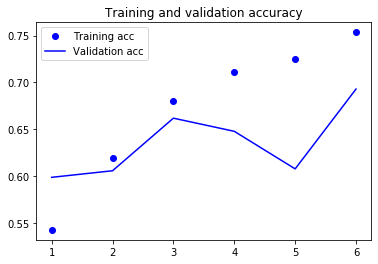

In [37]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [38]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

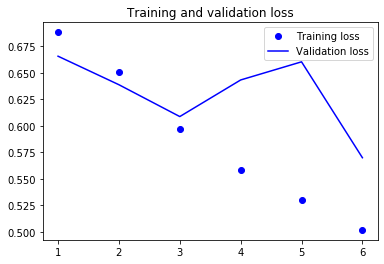

In [42]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()